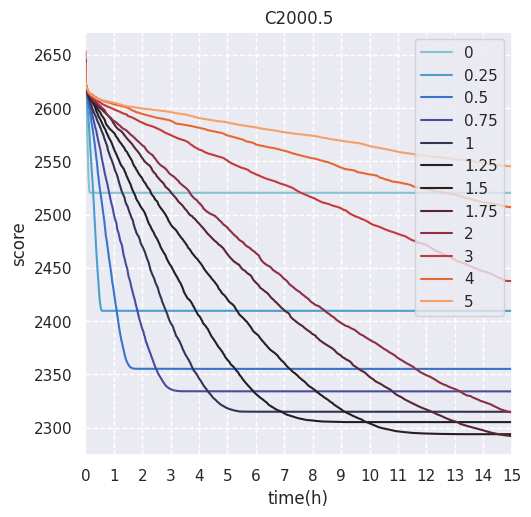

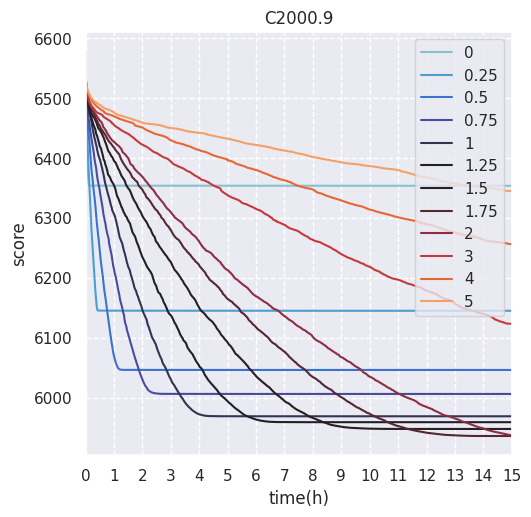

In [5]:
"""
Generate plot of the evolution of the score for the tests on the coefficient exploration vs exploitation.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_theme()

parameters = [
    "0",
    "0.25",
    "0.5",
    "0.75",
    "1",
    "1.25",
    "1.5",
    "1.75",
    "2",
    "3",
    "4",
    "5",
]

problem = "wvcp"

# For the 4 instances during 5h
repertory = "outputs/mcts_coeff_all"
nb_hours = 5
instances = [
    "DSJC500.5",
    "latin_square_10",
    "le450_25a",
    "wap01a",
]

# For the C2000 instances during 15h
nb_hours = 15
instances = [
    "C2000.5",
    "C2000.9",
]

nb_rand_seed = 20

time_limit = 3600 * nb_hours

colors = sns.color_palette("icefire", len(parameters))

for instance in instances:

    fig, ax = plt.subplots(figsize=(5.5, 5.5))

    for i, p in enumerate(parameters):
        times_x = []
        score_y = []
        for rand_seed in range(nb_rand_seed):
            file = f"{repertory}/{p}/{instance}_{rand_seed}.csv"
            data = pd.read_csv(file, comment="#")[["score", "turn", "time", "nb_colors"]]
            data.at[len(data) - 1, "time"] = time_limit
            times_x.append(data.time.to_list())
            score_y.append(data.score.to_list())
            # ax.plot(data.time, data.score, label=f"{p}", color=colors[i])
        max_time = max(times[-1] for times in times_x)
        x_axis = [i for i in range(max_time)]
        # interpolation of the score for each rand seed
        score_interpolations = [
            np.interp(x_axis, times_x[i], score_y[i]) for i in range(nb_rand_seed)
        ]
        # mean of the interpolations of the scores
        y_axis = np.mean(score_interpolations, axis=0)

        ax.plot(x_axis, y_axis, label=f"{p}", color=colors[i])

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.xlabel("time(h)")
    plt.xticks([i * 3600 for i in range(nb_hours + 1)], list(range(nb_hours + 1)))
    ticks_x = ticker.FuncFormatter(lambda x, pos: f"{x / 3600:0.0f}")
    ax.xaxis.set_major_formatter(ticks_x)
    plt.ylabel("score")
    plt.xlim(left=0, right=nb_hours * 3600)
    plt.grid(True, which="both", linestyle="--")
    # set the legend on the right of the plot
    ax.legend(loc="upper right")
    plt.title(f"{instance}")
    plt.savefig(f"coeff_{instance}.png", bbox_inches="tight")
    # plt.show()
